# **India Population Data Analysis**

## Step 1: Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Reading the datasets

In [2]:
population_data = pd.read_csv('/kaggle/input/india-population-data/1.1 - India_Historical_Population_Density_Data.csv')
population_density_data = pd.read_csv('/kaggle/input/india-population-data/1.3 - India_Historical_Population_Growth_Rate_Data.csv')
rural_population_data = pd.read_csv('/kaggle/input/india-population-data/1.4 - India_Rural_Population_Historical_Data.csv')
urban_population_data = pd.read_csv('/kaggle/input/india-population-data/1.5 - India_Urban_Population_Historical_Data.csv')
birth_rate_data = pd.read_csv('/kaggle/input/india-population-data/1.6 - India_Historical_Birth_Rate_Data.csv')
death_rate_data = pd.read_csv('/kaggle/input/india-population-data/1.7 -India_Historical_Death_Rate_Data.csv')
fertility_rate_data = pd.read_csv('/kaggle/input/india-population-data/1.8 - India_Historical_Fertility_Rate_Data.csv')
infant_mortality_rate_data = pd.read_csv('/kaggle/input/india-population-data/1.9  - India_Historical_Infant_Mortality_Rate_Data.csv')
life_expectancy_data = pd.read_csv('/kaggle/input/india-population-data/2 - India_Historical_Life_Expectancy_Data.csv')

In [3]:
datasets = {
    'Population Data': population_data,
    'Population Density Data': population_density_data,
    'Rural Population Data': rural_population_data,
    'Urban Population Data': urban_population_data,
    'Birth Rate Data': birth_rate_data,
    'Death Rate Data': death_rate_data,
    'Fertility Rate Data': fertility_rate_data,
    'Infant Mortality Rate Data': infant_mortality_rate_data,
    'Life Expectancy Data': life_expectancy_data
}

## Step 3: Displaying the first few rows of each dataset

In [4]:
for name, data in datasets.items():
    print(f"{name}:")
    display(data.head())

Population Data:


,Unnamed: 0,year,popu1ation_growth_rate,Population_Density,growth_rate
0,0,2024,"1,441,719,852",438.58,0.92%
1,1,2023,"1,428,627,663",434.60,0.81%
2,2,2022,"1,417,173,173",431.11,0.68%
3,3,2021,"1,407,563,842",428.19,0.80%
4,4,2020,"1,396,387,127",424.79,0.96%


Population Density Data:


,Unnamed: 0,year,popu1ation_growth_rate,growth_rate
0,0,2024,"1,441,719,852",0.92%
1,1,2023,"1,428,627,663",0.81%
2,2,2022,"1,417,173,173",0.68%
3,3,2021,"1,407,563,842",0.80%
4,4,2020,"1,396,387,127",0.96%


Rural Population Data:


,Unnamed: 0,year,Population,percent_of_total,Change
0,0,2022,"908,804,812",64.13,-0.06%
1,1,2021,"909,384,771",64.61,0.08%
2,2,2020,"908,684,959",65.07,0.26%
3,3,2019,"906,325,664",65.53,0.35%
4,4,2018,"903,131,481",65.97,0.44%


Urban Population Data:


,Unnamed: 0,year,Population,percent_of_total,Change
0,0,2022,"508,368,361",35.87,2.02%
1,1,2021,"498,179,071",35.39,2.13%
2,2,2020,"487,702,168",34.93,2.26%
3,3,2019,"476,786,386",34.47,2.32%
4,4,2018,"465,871,825",34.03,2.36%


Birth Rate Data:


,Unnamed: 0,year,Birth_Rate,Growth_Rate
0,0,2024,16.750,-1.170%
1,1,2023,16.949,-1.250%
2,2,2022,17.163,-1.230%
3,3,2021,17.377,-1.220%
4,4,2020,17.592,-1.200%


Death Rate Data:


,Unnamed: 0,year,Death_Rate,Growth_Rate
0,0,2024,7.473,0.770%
1,1,2023,7.416,0.490%
2,2,2022,7.380,0.490%
3,3,2021,7.344,0.480%
4,4,2020,7.309,0.490%


Fertility Rate Data:


,Unnamed: 0,year,Fertility_Rate,Growth_Rate
0,0,2024,2.122,-0.790%
1,1,2023,2.139,-0.930%
2,2,2022,2.159,-0.920%
3,3,2021,2.179,-0.950%
4,4,2020,2.200,-0.900%


Infant Mortality Rate Data:


,Unnamed: 0,year,Infant_Mortality_Rate,Growth_Rate
0,0,2024,25.799,-3.080%
1,1,2023,26.619,-3.890%
2,2,2022,27.695,-3.740%
3,3,2021,28.771,-3.610%
4,4,2020,29.848,-3.480%


Life Expectancy Data:


,Unnamed: 0,year,Life_Expectancy
0,0,2024,70.62
1,1,2023,70.42
2,2,2022,70.19
3,3,2021,69.96
4,4,2020,69.73


## Step 4: Data Cleaning

### Renaming columns


In [5]:
for name, data in datasets.items():
    data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [6]:
population_data.rename(columns={'popu1ation_growth_rate': 'population_growth_rate'}, inplace=True)

population_density_data.rename(columns={'popu1ation_growth_rate': 'population_growth_rate'}, inplace=True)

### Handling Missing Values

In [11]:
for name, data in datasets.items():
    print(f"Missing Values in {name}:")
    print(data.isnull().sum())
    print("\n")

Missing Values in Population Data:
id                        0
year                      0
population_growth_rate    0
Population_Density        0
growth_rate               0
dtype: int64


Missing Values in Population Density Data:
id                        0
year                      0
population_growth_rate    0
growth_rate               0
dtype: int64


Missing Values in Rural Population Data:
id                  0
year                0
Population          0
percent_of_total    0
Change              0
dtype: int64


Missing Values in Urban Population Data:
id                  0
year                0
Population          0
percent_of_total    0
Change              0
dtype: int64


Missing Values in Birth Rate Data:
id             0
year           0
Birth_Rate     0
Growth_Rate    0
dtype: int64


Missing Values in Death Rate Data:
id             0
year           0
Death_Rate     0
Growth_Rate    0
dtype: int64


Missing Values in Fertility Rate Data:
id                0
year         

In [10]:
for name, data in datasets.items():
    print(f"Data Types for {name}:")
    print(data.dtypes)
    print("\n")

Data Types for Population Data:
id                          int64
year                        int64
population_growth_rate     object
Population_Density        float64
growth_rate                object
dtype: object


Data Types for Population Density Data:
id                         int64
year                       int64
population_growth_rate    object
growth_rate               object
dtype: object


Data Types for Rural Population Data:
id                    int64
year                  int64
Population           object
percent_of_total    float64
Change               object
dtype: object


Data Types for Urban Population Data:
id                    int64
year                  int64
Population           object
percent_of_total    float64
Change               object
dtype: object


Data Types for Birth Rate Data:
id               int64
year             int64
Birth_Rate     float64
Growth_Rate     object
dtype: object


Data Types for Death Rate Data:
id               int64
year       

### Converting data types

#### Removing '%' sign and converting to float

In [12]:
population_data['growth_rate'] = population_data['growth_rate'].str.replace('%', '').astype(float)
population_density_data['growth_rate'] = population_density_data['growth_rate'].str.replace('%', '').astype(float)
rural_population_data['Change'] = rural_population_data['Change'].str.replace('%', '').astype(float)
urban_population_data['Change'] = urban_population_data['Change'].str.replace('%', '').astype(float)
birth_rate_data['Growth_Rate'] = birth_rate_data['Growth_Rate'].str.replace('%', '').astype(float)
death_rate_data['Growth_Rate'] = death_rate_data['Growth_Rate'].str.replace('%', '').astype(float)
fertility_rate_data['growth_rate'] = fertility_rate_data['Growth_Rate'].str.replace('%', '').astype(float)
infant_mortality_rate_data['Growth_Rate'] = infant_mortality_rate_data['Growth_Rate'].str.replace('%', '').astype(float)

#### Removing commas and converting to integers

In [13]:
population_data['population_growth_rate'] = population_data['population_growth_rate'].str.replace(',', '').astype(int)
population_density_data['population_growth_rate'] = population_density_data['population_growth_rate'].str.replace(',', '').astype(int)
rural_population_data['Population'] = pd.to_numeric(rural_population_data['Population'].str.replace(',', ''))
urban_population_data['Population'] = pd.to_numeric(urban_population_data['Population'].str.replace(',', ''))

### Ensuring consistency

#### Checking for duplicate values

In [16]:
for name, data in datasets.items():
    print(f"Duplicate Values in {name}:", end = " ")
    print(data.duplicated().sum())

Duplicate Values in Population Data: 0
Duplicate Values in Population Density Data: 0
Duplicate Values in Rural Population Data: 0
Duplicate Values in Urban Population Data: 0
Duplicate Values in Birth Rate Data: 0
Duplicate Values in Death Rate Data: 0
Duplicate Values in Fertility Rate Data: 0
Duplicate Values in Infant Mortality Rate Data: 0
Duplicate Values in Life Expectancy Data: 0


#### Descriptive statistics for each dataset

In [18]:
for name, data in datasets.items():
    print(f"Descriptive Statistics for {name}:")
    display(data.describe(include='all'))
    print("\n")

Descriptive Statistics for Population Data:


,id,year,population_growth_rate,Population_Density,growth_rate
count,75.000000,75.000000,7.500000e+01,75.000000,75.000000
mean,37.000000,1987.000000,8.536189e+08,259.675333,1.879867
std,21.794495,21.794495,3.449457e+08,104.934577,0.520863
min,0.000000,1950.000000,3.570211e+08,108.610000,0.000000
25%,18.500000,1968.500000,5.393733e+08,164.080000,1.510000
50%,37.000000,1987.000000,8.157161e+08,248.140000,2.180000
75%,55.500000,2005.500000,1.163506e+09,353.945000,2.255000
max,74.000000,2024.000000,1.441720e+09,438.580000,2.340000




Descriptive Statistics for Population Density Data:


,id,year,population_growth_rate,growth_rate
count,75.000000,75.000000,7.500000e+01,75.000000
mean,37.000000,1987.000000,8.536189e+08,1.879867
std,21.794495,21.794495,3.449457e+08,0.520863
min,0.000000,1950.000000,3.570211e+08,0.000000
25%,18.500000,1968.500000,5.393733e+08,1.510000
50%,37.000000,1987.000000,8.157161e+08,2.180000
75%,55.500000,2005.500000,1.163506e+09,2.255000
max,74.000000,2024.000000,1.441720e+09,2.340000




Descriptive Statistics for Rural Population Data:


,id,year,Population,percent_of_total,Change
count,63.000000,63.000000,6.300000e+01,63.000000,63.000000
mean,31.000000,1991.000000,6.576528e+08,74.134444,1.443651
std,18.330303,18.330303,1.796176e+08,5.141919,0.604076
min,0.000000,1960.000000,3.660217e+08,64.130000,-0.060000
25%,15.500000,1975.500000,4.948926e+08,70.260000,0.965000
50%,31.000000,1991.000000,6.597904e+08,74.220000,1.760000
75%,46.500000,2006.500000,8.298086e+08,78.495000,1.890000
max,62.000000,2022.000000,9.093848e+08,82.080000,2.170000




Descriptive Statistics for Urban Population Data:


,id,year,Population,percent_of_total,Change
count,63.000000,63.000000,6.300000e+01,63.000000,63.000000
mean,31.000000,1991.000000,2.502806e+08,25.866508,2.936508
std,18.330303,18.330303,1.287808e+08,5.141283,0.619558
min,0.000000,1960.000000,7.993290e+07,17.920000,0.000000
25%,15.500000,1975.500000,1.355953e+08,21.505000,2.575000
50%,31.000000,1991.000000,2.291514e+08,25.780000,2.910000
75%,46.500000,2006.500000,3.512242e+08,29.740000,3.240000
max,62.000000,2022.000000,5.083684e+08,35.870000,3.880000




Descriptive Statistics for Birth Rate Data:


,id,year,Birth_Rate,Growth_Rate
count,75.000000,75.000000,75.000000,75.000000
mean,37.000000,1987.000000,31.771133,-1.282667
std,21.794495,21.794495,8.922046,0.715299
min,0.000000,1950.000000,16.750000,-3.210000
25%,18.500000,1968.500000,24.022500,-1.735000
50%,37.000000,1987.000000,33.517000,-1.220000
75%,55.500000,2005.500000,39.634500,-0.650000
max,74.000000,2024.000000,44.175000,0.000000




Descriptive Statistics for Death Rate Data:


,id,year,Death_Rate,Growth_Rate
count,75.000000,75.000000,75.000000,75.000000
mean,37.000000,1987.000000,13.697333,-1.748800
std,21.794495,21.794495,6.367633,0.969525
min,0.000000,1950.000000,7.237000,-2.820000
25%,18.500000,1968.500000,8.090500,-2.450000
50%,37.000000,1987.000000,11.786000,-2.090000
75%,55.500000,2005.500000,18.139500,-1.440000
max,74.000000,2024.000000,28.161000,0.770000




Descriptive Statistics for Fertility Rate Data:


,id,year,Fertility_Rate,Growth_Rate,growth_rate
count,75.000000,75.000000,75.000000,75,75.000000
unique,NaN,NaN,NaN,58,NaN
top,NaN,NaN,NaN,-0.020%,NaN
freq,NaN,NaN,NaN,9,NaN
mean,37.000000,1987.000000,4.234800,NaN,-1.352267
std,21.794495,21.794495,1.372041,NaN,0.877168
min,0.000000,1950.000000,2.122000,NaN,-3.230000
25%,18.500000,1968.500000,2.968000,NaN,-1.985000
50%,37.000000,1987.000000,4.349000,NaN,-1.350000
75%,55.500000,2005.500000,5.691500,NaN,-0.690000




Descriptive Statistics for Infant Mortality Rate Data:


,id,year,Infant_Mortality_Rate,Growth_Rate
count,75.000000,75.000000,75.000000,75.000000
mean,37.000000,1987.000000,99.870467,-2.619200
std,21.794495,21.794495,50.289976,1.069002
min,0.000000,1950.000000,25.799000,-5.040000
25%,18.500000,1968.500000,54.705000,-3.500000
50%,37.000000,1987.000000,95.730000,-2.570000
75%,55.500000,2005.500000,144.812000,-1.585000
max,74.000000,2024.000000,189.629000,0.000000




Descriptive Statistics for Life Expectancy Data:


,id,year,Life_Expectancy
count,75.000000,75.000000,75.000000
mean,37.000000,1987.000000,55.276933
std,21.794495,21.794495,10.698504
min,0.000000,1950.000000,35.210000
25%,18.500000,1968.500000,46.425000
50%,37.000000,1987.000000,56.330000
75%,55.500000,2005.500000,64.515000
max,74.000000,2024.000000,70.620000


## Step 5: Data Visualizing 

#### Plotting Growth Rate Over the Years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


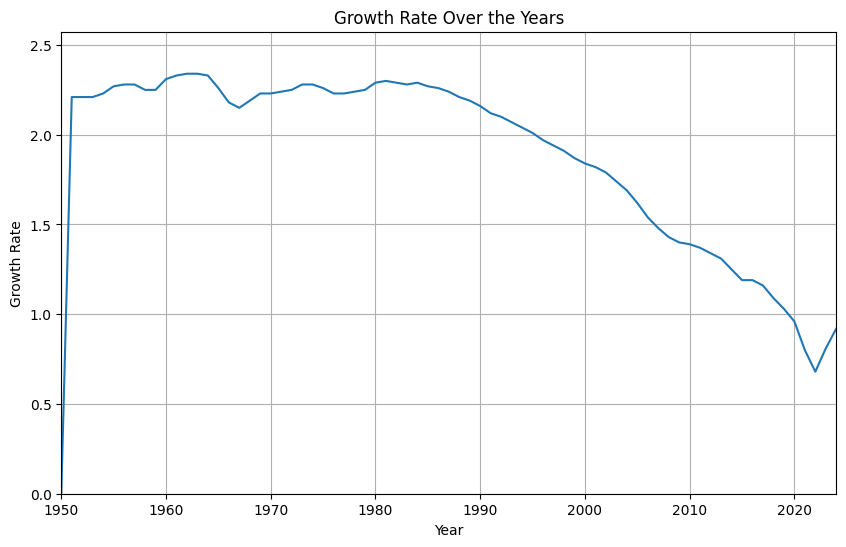

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=population_data, x='year', y='growth_rate')
plt.title('Growth Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.grid(True)
plt.xlim(population_data['year'].min(), population_data['year'].max())
plt.ylim(population_data['growth_rate'].min(), population_data['growth_rate'].max() * 1.1)
plt.show()

#### Plotting Population Growth Rate Over the Years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


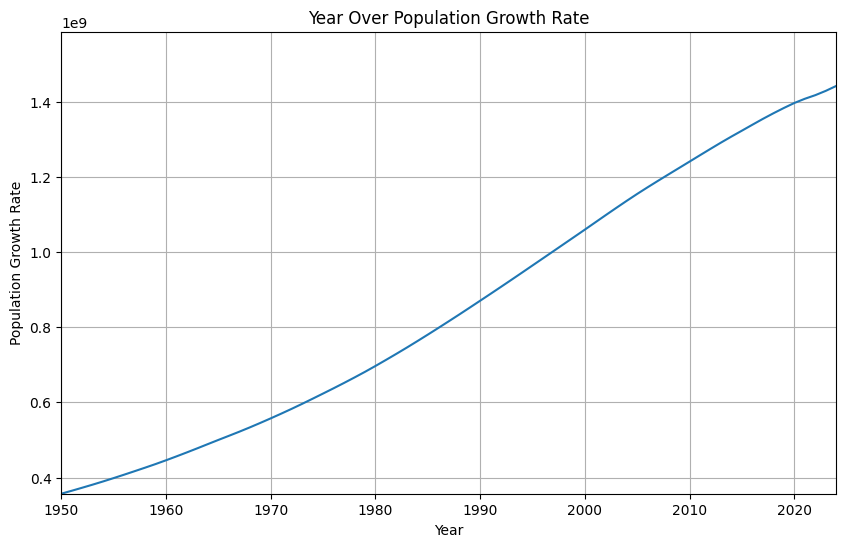

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=population_data, x='year', y='population_growth_rate')
plt.title('Year Over Population Growth Rate')
plt.xlabel('Year')
plt.ylabel('Population Growth Rate')
plt.grid(True)
plt.xlim(population_data['year'].min(), population_data['year'].max())
plt.ylim(population_data['population_growth_rate'].min(), population_data['population_growth_rate'].max() * 1.1)
plt.show()

#### Plotting Population Density Over the Years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


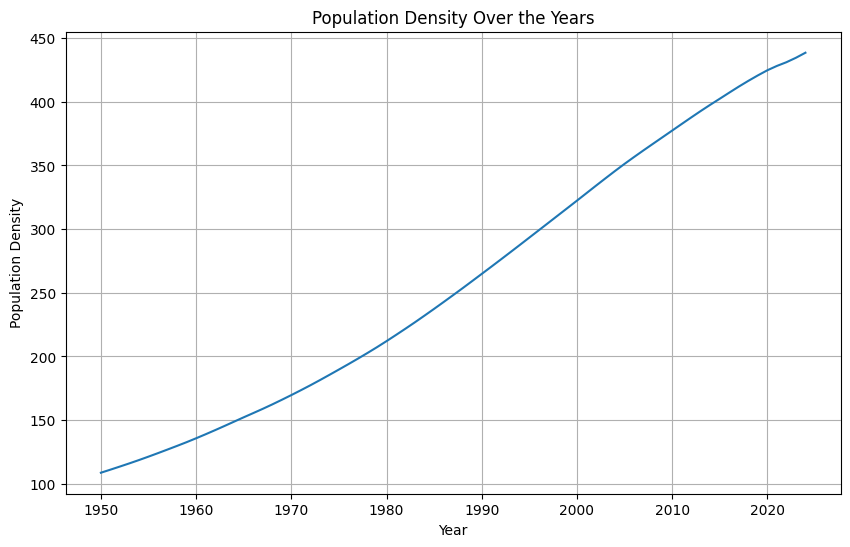

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=population_data, x='year', y='Population_Density')
plt.title('Population Density Over the Years')
plt.xlabel('Year')
plt.ylabel('Population Density')
plt.grid(True)
plt.show()

#### Plotting Rural vs Urban Population Over the Years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

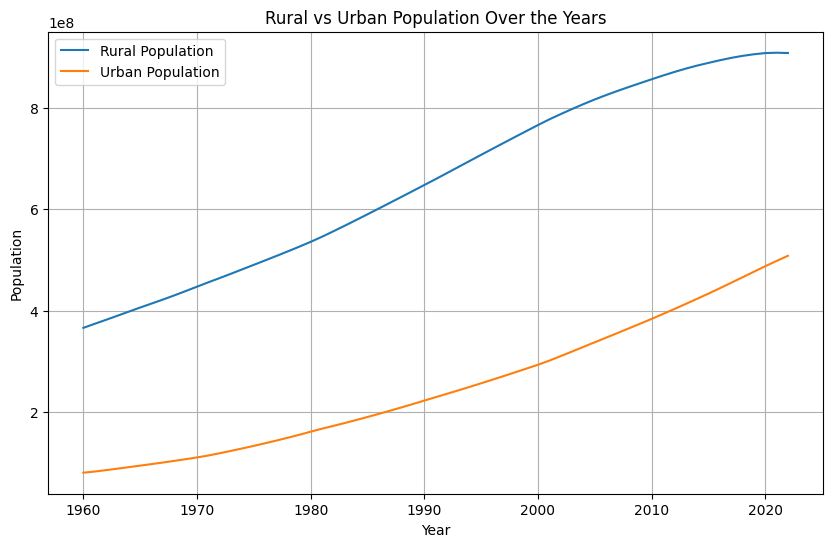

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=rural_population_data, x='year', y='Population', label='Rural Population')
sns.lineplot(data=urban_population_data, x='year', y='Population', label='Urban Population')
plt.title('Rural vs Urban Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

#### Plotting Change in Rural vs Urban Population Over the Years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

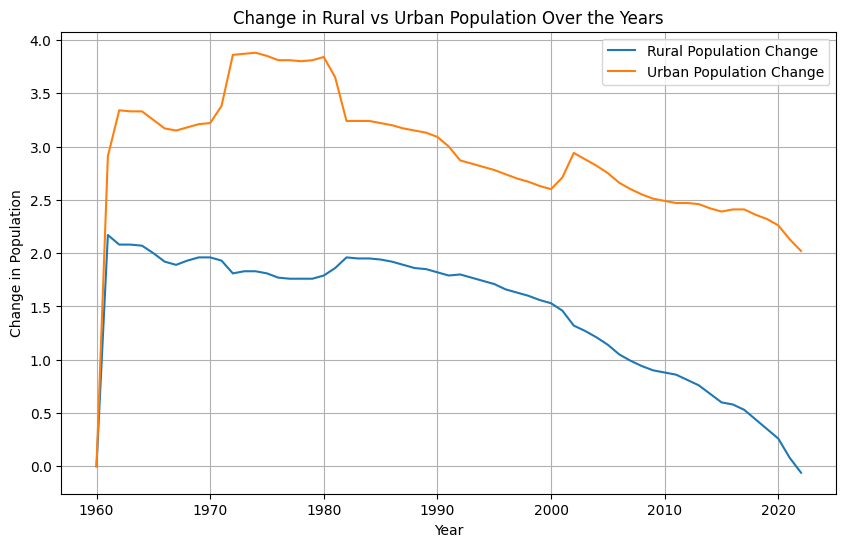

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=rural_population_data, x='year', y='Change', label='Rural Population Change')
sns.lineplot(data=urban_population_data, x='year', y='Change', label='Urban Population Change')
plt.title('Change in Rural vs Urban Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Change in Population')
plt.legend()
plt.grid(True)
plt.show()

#### Plotting Birth and Death Rates Over the Years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

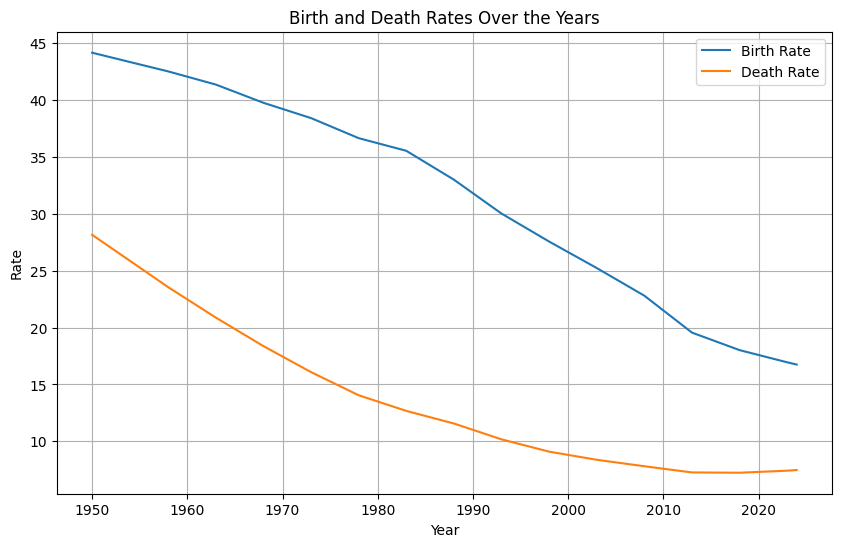

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=birth_rate_data, x='year', y='Birth_Rate', label='Birth Rate')
sns.lineplot(data=death_rate_data, x='year', y='Death_Rate', label='Death Rate')
plt.title('Birth and Death Rates Over the Years')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

#### Plotting Fertility Rate Over the Years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


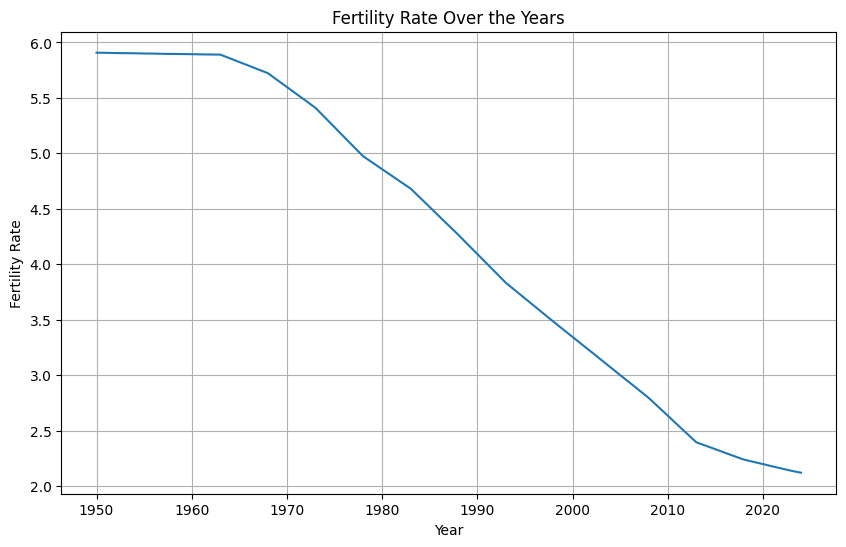

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=fertility_rate_data, x='year', y='Fertility_Rate')
plt.title('Fertility Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.grid(True)
plt.show()

#### Plotting Infant Mortality Rate Over the Years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


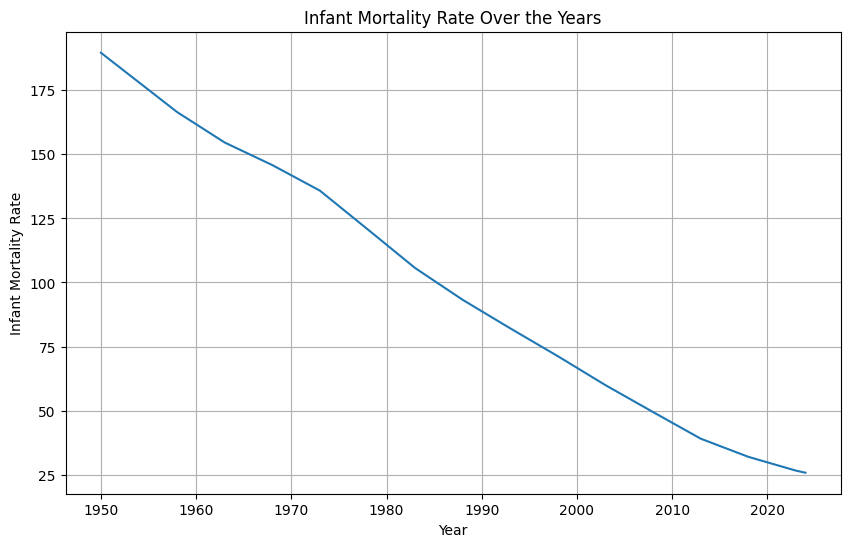

In [35]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=infant_mortality_rate_data, x='year', y='Infant_Mortality_Rate')
plt.title('Infant Mortality Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Infant Mortality Rate')
plt.grid(True)
plt.show()

#### Plotting Life Expectancy Over the Years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


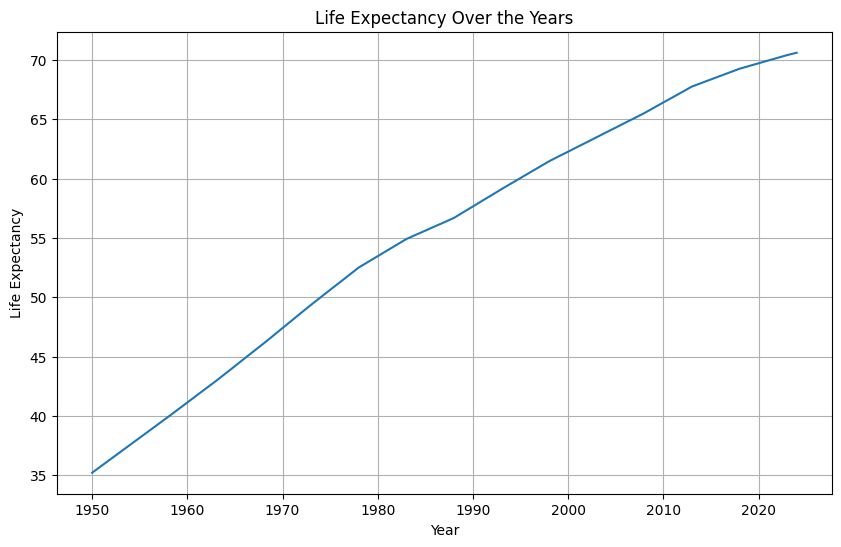

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=life_expectancy_data, x='year', y='Life_Expectancy')
plt.title('Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

#### Comparing Population Density with Growth Rate

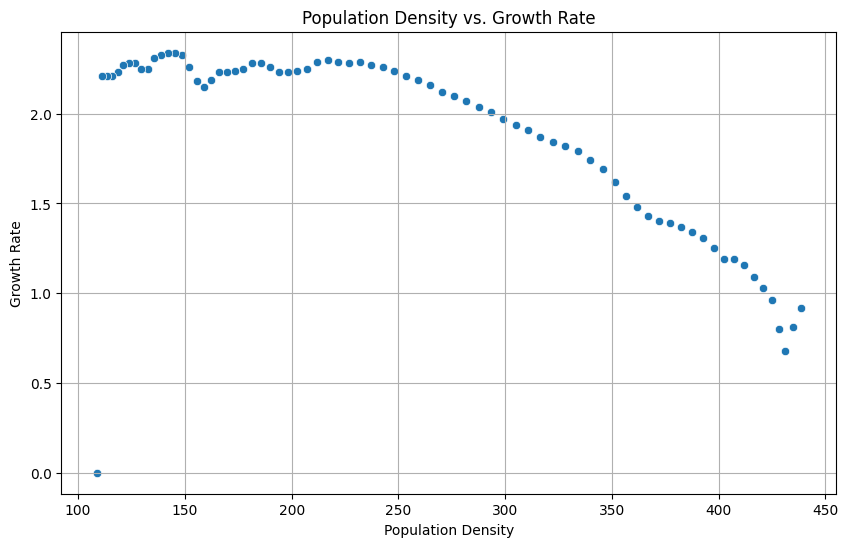

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=population_data, x='Population_Density', y='growth_rate')
plt.title('Population Density vs. Growth Rate')
plt.xlabel('Population Density')
plt.ylabel('Growth Rate')
plt.grid(True)
plt.show()

#### Birth Rate vs. Fertility Rate

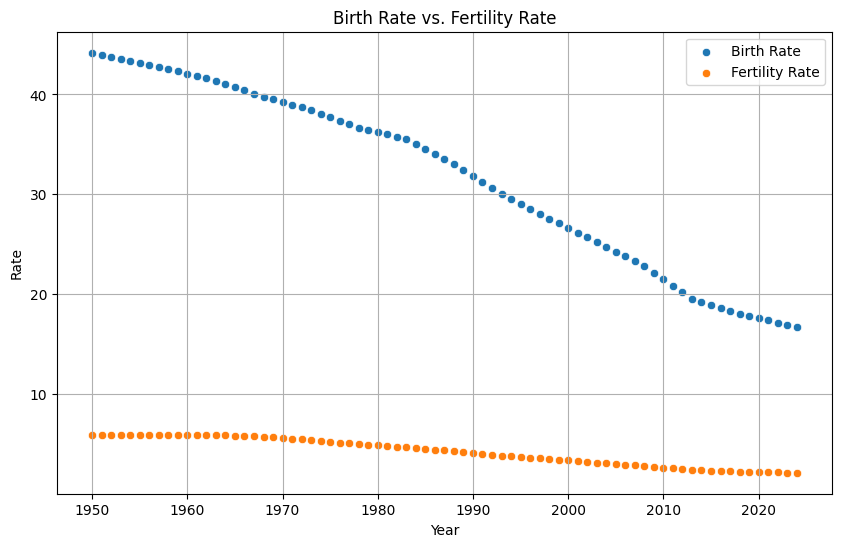

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=birth_rate_data, x='year', y='Birth_Rate', label='Birth Rate')
sns.scatterplot(data=fertility_rate_data, x='year', y='Fertility_Rate', label='Fertility Rate')
plt.title('Birth Rate vs. Fertility Rate')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

#### Infant Mortality Rate vs. Life Expectancy

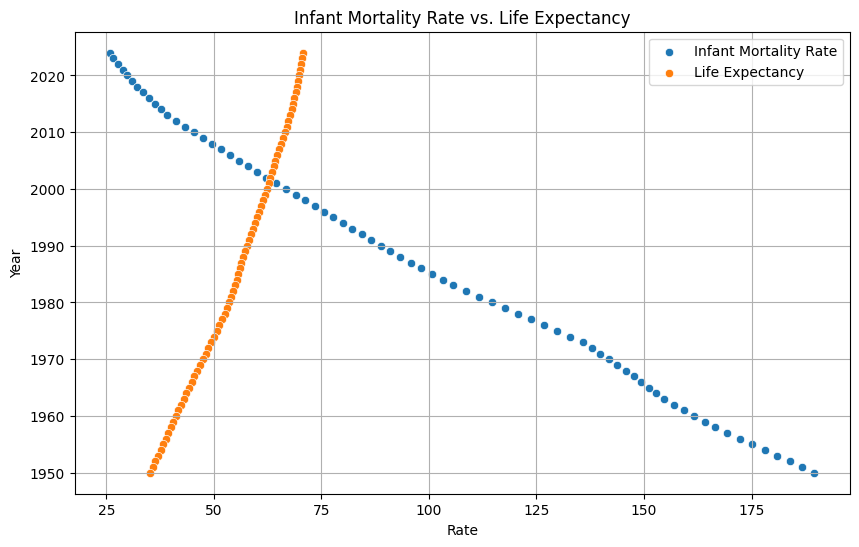

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=infant_mortality_rate_data, x='Infant_Mortality_Rate', y='year', label='Infant Mortality Rate')
sns.scatterplot(data=life_expectancy_data, x='Life_Expectancy', y='year', label='Life Expectancy')
plt.title('Infant Mortality Rate vs. Life Expectancy')
plt.xlabel('Rate')
plt.ylabel('Year')
plt.legend()
plt.grid(True)
plt.show()

#### Bar Plot of Average Population Growth Rate by Decade

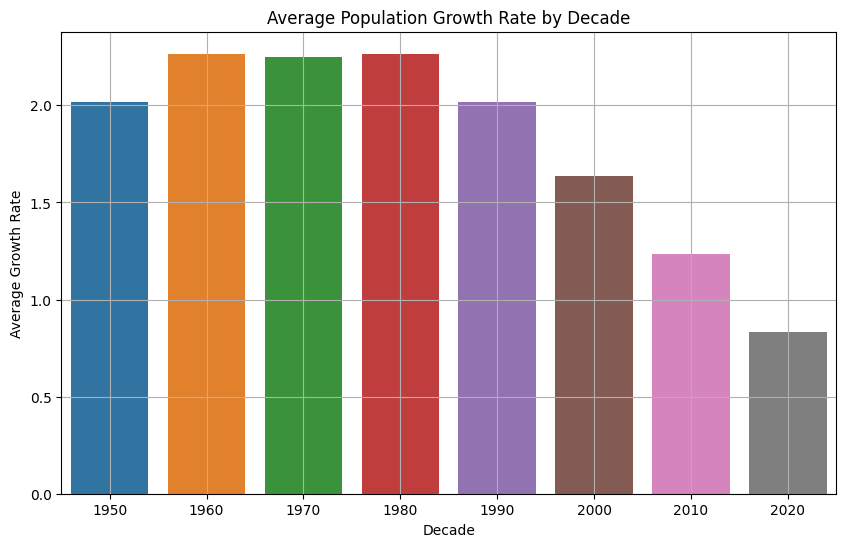

In [41]:
population_data['decade'] = (population_data['year'] // 10) * 10
avg_growth_rate_by_decade = population_data.groupby('decade')['growth_rate'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_growth_rate_by_decade, x='decade', y='growth_rate')
plt.title('Average Population Growth Rate by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Growth Rate')
plt.grid(True)
plt.show()

#### Histogram of Birth Rates

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


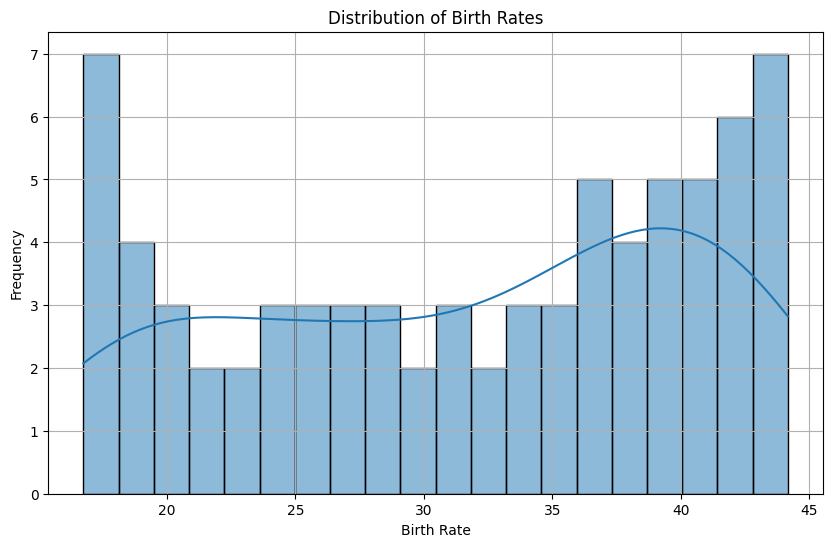

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(birth_rate_data['Birth_Rate'], bins=20, kde=True)
plt.title('Distribution of Birth Rates')
plt.xlabel('Birth Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Box Plot of Life Expectancy by Decade

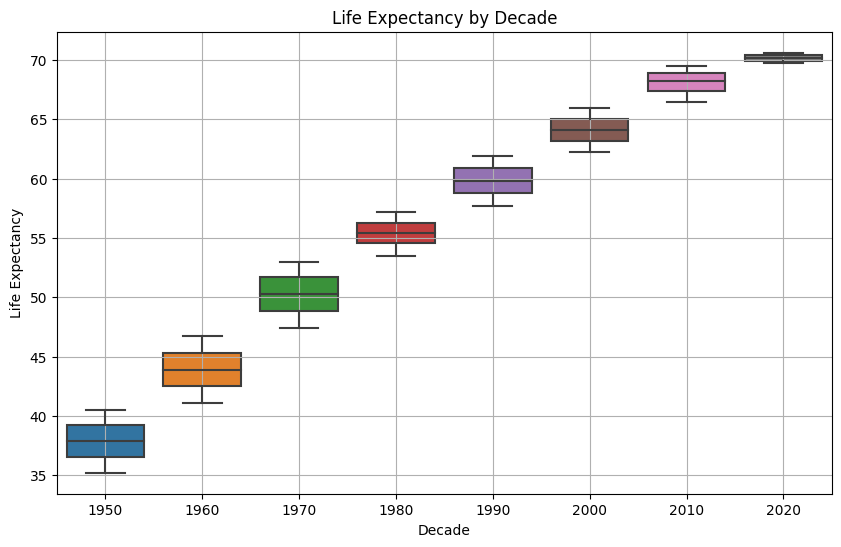

In [43]:
life_expectancy_data['decade'] = (life_expectancy_data['year'] // 10) * 10
plt.figure(figsize=(10, 6))
sns.boxplot(data=life_expectancy_data, x='decade', y='Life_Expectancy')
plt.title('Life Expectancy by Decade')
plt.xlabel('Decade')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

#### Heatmap of Correlation Matrix for Life Expectancy Data

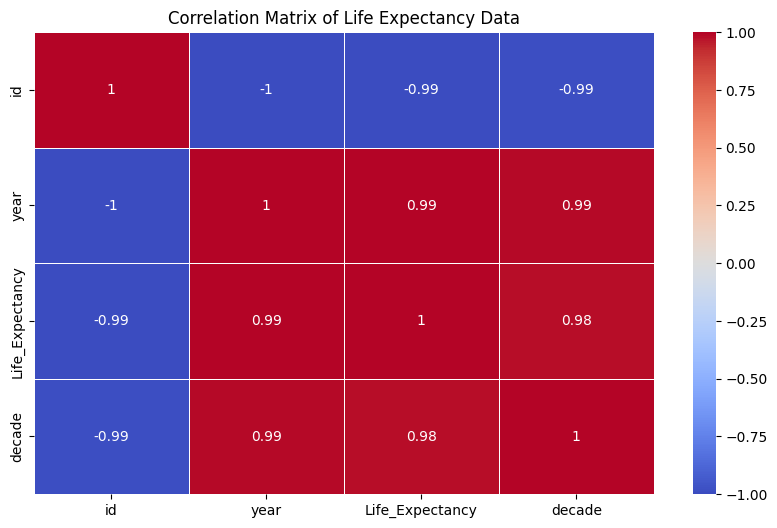

In [44]:
plt.figure(figsize=(10, 6))
correlation_matrix = life_expectancy_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Life Expectancy Data')
plt.show()

# Conclusion

### Summary of Findings
In this notebook, we explored various datasets related to India's population, including historical data on population density, rural and urban populations, birth and death rates, fertility rates, infant mortality rates, and life expectancy. Through data cleaning, transformation, and visualization, we were able to uncover key trends and insights:
- The population growth rate has shown significant changes over the years.
- There is a notable difference between rural and urban population trends.
- Birth and death rates have varied considerably, impacting overall population dynamics.
- Fertility rates have declined over the years, which is reflected in the birth rate trends.
- Infant mortality rates have decreased, correlating with improvements in life expectancy.


### Conclusions

- The growth rate of India's population has undergone various phases, with periods of rapid growth and relative stability.
- Urbanization is evident, with the urban population growing at a faster rate compared to the rural population.
- Improvements in healthcare and living conditions are reflected in the declining infant mortality rate and increasing life expectancy.
- Fertility rates have shown a downward trend, contributing to changes in birth rates.

